# Data Science Practise A2
12112504 郭城

The PDF format may not provide optimal clarity. An HTML version has been uploaded for better visibility and accessibility.

### Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
offers = pd.read_csv("datasets/data_offers.csv")
orders = pd.read_csv("datasets/data_orders.csv")

### Check data

In [3]:
offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [4]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


___

<span style="color: green; font-size: 35px;">Q1</span>

Question: Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

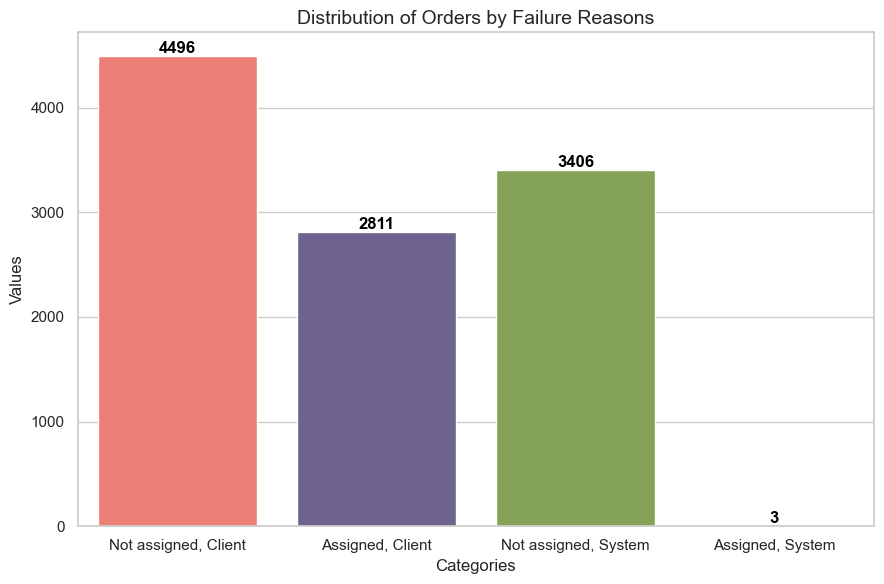

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
A = orders[(orders["is_driver_assigned_key"] == 0) & (orders["order_status_key"] == 4)].shape[0]
B = orders[(orders["is_driver_assigned_key"] == 1) & (orders["order_status_key"] == 4)].shape[0]
C = orders[(orders["is_driver_assigned_key"] == 0) & (orders["order_status_key"] == 9)].shape[0]
D = orders[(orders["is_driver_assigned_key"] == 1) & (orders["order_status_key"] == 9)].shape[0]

data = [A, B, C, D]
labels = ['Not assigned, Canceled by Client', 'Assigned, Canceled by Client', 'Not assigned, Canceled by System', 'Assigned, Canceled by System']

# Abbreviate the labels
abbrev_labels = ['Not assigned, Client', 'Assigned, Client', 'Not assigned, System', 'Assigned, System']

# Custom color palette
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn with custom colors
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=abbrev_labels, y=data, palette=colors)

# Add labels and title
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Distribution of Orders by Failure Reasons', fontsize=14)

# Rotate x-axis labels
# plt.xticks(rotation=0, ha='center')

# Add data labels inside the bars
for i, v in enumerate(data):
    ax.text(i, v+70, str(v), color='black', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


#### Analysis and Answers:

This analysis indicates that the main reason for order failures is client cancellations when orders are left unassigned to drivers.

Possible explanations for these observations:

The peak is observed in the "Not assigned, Client" category:

    1. Unassigned orders often lead to cancellations without penalties.
    2. Extended waiting periods due to unassigned orders may prompt clients to cancel.
The "Assigned, System" category comprises only three orders:

    3. After assignment, driver cancellations involve penalty fees.
Further investigation is required to confirm and expand upon these conclusions.

---
<span style="color: green; font-size: 35px;">Q2</span>

Question: Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [6]:
df = orders
df['order_datetime'] = pd.to_datetime(df['order_datetime'])
df['hour'] = df['order_datetime'].dt.hour

/var/folders/g0/81mqbm3d64vg6jdjp2r87jph0000gn/T/ipykernel_4206/2045571090.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_datetime'] = pd.to_datetime(df['order_datetime'])


---
### Plot each Columns by Hour
The lines are spaced apart by a certain distance to improve the visual clarity.

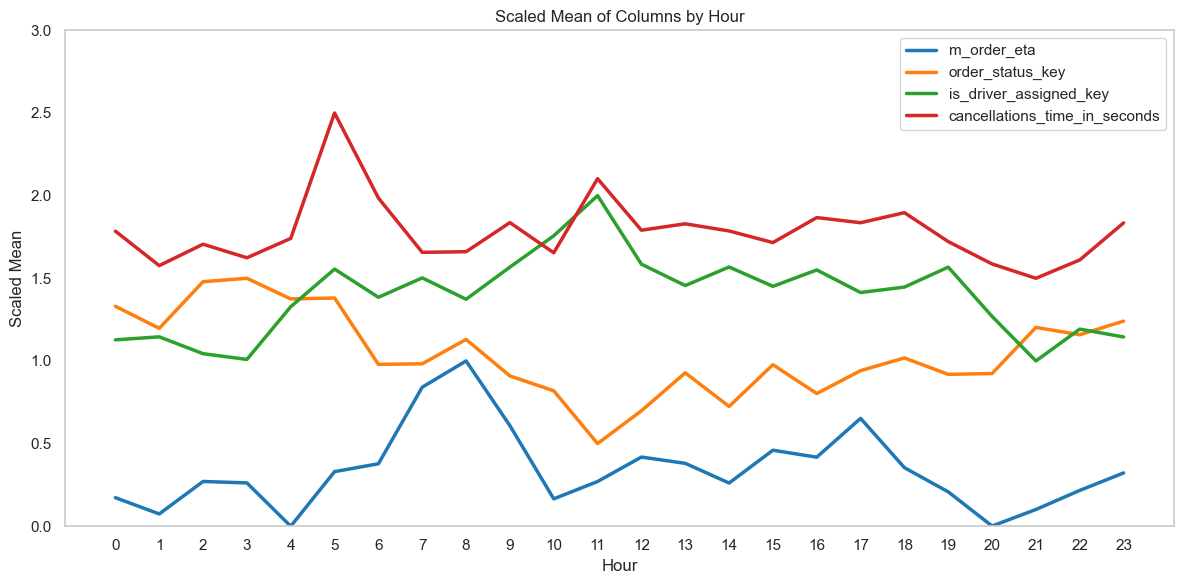

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have loaded and processed the data from the CSV file for data_orders
data_orders = df
# Convert order_datetime to datetime
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])

# Extract hour from order_datetime
data_orders['hour'] = data_orders['order_datetime'].dt.hour

# Define columns for which you want to calculate the average
columns_to_average = ['m_order_eta', 'order_status_key', 'is_driver_assigned_key', 'cancellations_time_in_seconds']

# Calculate the mean of each column by hour
means_by_hour = data_orders.groupby('hour')[columns_to_average].mean()

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(means_by_hour)
scaled_means_by_hour = pd.DataFrame(scaled_data, columns=columns_to_average)

# Plotting
plt.figure(figsize=(12, 6))
# styles = ['-', '--', '-.', ':']  # Line styles for each column
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Line colors for each column (blue, orange, green, red)
linewidth = 2.5  # Line width
offset = 0.5  # Offset value for separating lines

for i, column in enumerate(columns_to_average):
    y_values = scaled_means_by_hour[column] + i * offset
    plt.plot(scaled_means_by_hour.index, y_values, label=column, color=colors[i % len(colors)], linewidth=linewidth)

plt.xlabel('Hour')
plt.ylabel('Scaled Mean')
plt.title('Scaled Mean of Columns by Hour')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.xticks(range(24))
plt.ylim(0, len(columns_to_average) * offset + 1)  # Adjust y-axis limits
plt.legend(loc='upper right')
plt.show()


#### Analysis and Answers:

    At 8 o'clock, we observe peaks in both order ETA and cancellation times. 
    Subsequently, at 11 o'clock, we witness peaks in driver assignments and another peak in cancellation times. Interestingly, the lowest point in order status occurs at 11 o'clock, but by substituting keys (4 for client cancellations and 9 for system cancellations), we find that the peak for client cancellations also aligns with this time.

---

### Failed Orders by Hour

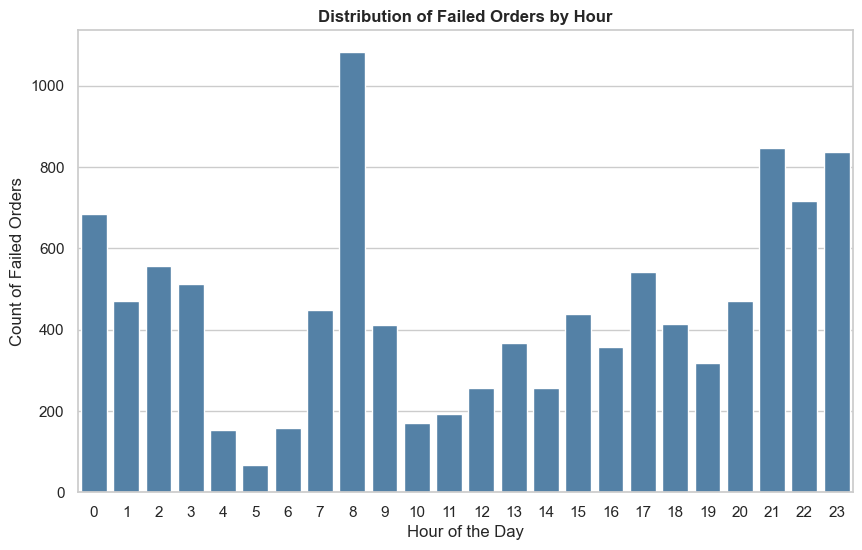

Hours with the highest number of failed orders:
   hour  count
8     8   1082


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for failed orders (order_status_key 4 and 9 are considered failed)
failed_orders = df[(df['order_status_key'] == 4) | (df['order_status_key'] == 9)]

# Group the data by hour to count the number of failed orders at each hour
failed_orders_by_hour = failed_orders.groupby('hour').size().reset_index(name='count')

# Create a bar plot to visualize the distribution of failed orders by hours
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=failed_orders_by_hour, color='steelblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Failed Orders')
plt.title('Distribution of Failed Orders by Hour',fontweight='bold')
plt.show()

# Analyze if certain hours have abnormally high proportions of different categories of failed orders
# You can further analyze the distribution based on 'is_driver_assigned_key' to identify trends

# Identify the hours with the highest number of failed orders
max_failed_hours = failed_orders_by_hour[failed_orders_by_hour['count'] == failed_orders_by_hour['count'].max()]
print("Hours with the highest number of failed orders:")
print(max_failed_hours)

# Provide insights on the observed patterns in failed orders by hours
# This could involve looking at factors like peak demand hours, operational issues, etc.


#### Analysis and Answers:

    At 8 o'clock, the highest number of failed orders occurs, likely due to the morning peak.
    A significant influx of commuters heading to work increases the demand for taxis, contributing to this surge in failed orders. Moreover, the heavy traffic congestion exacerbates the situation.

---

### Failed Orders by Category and Hour

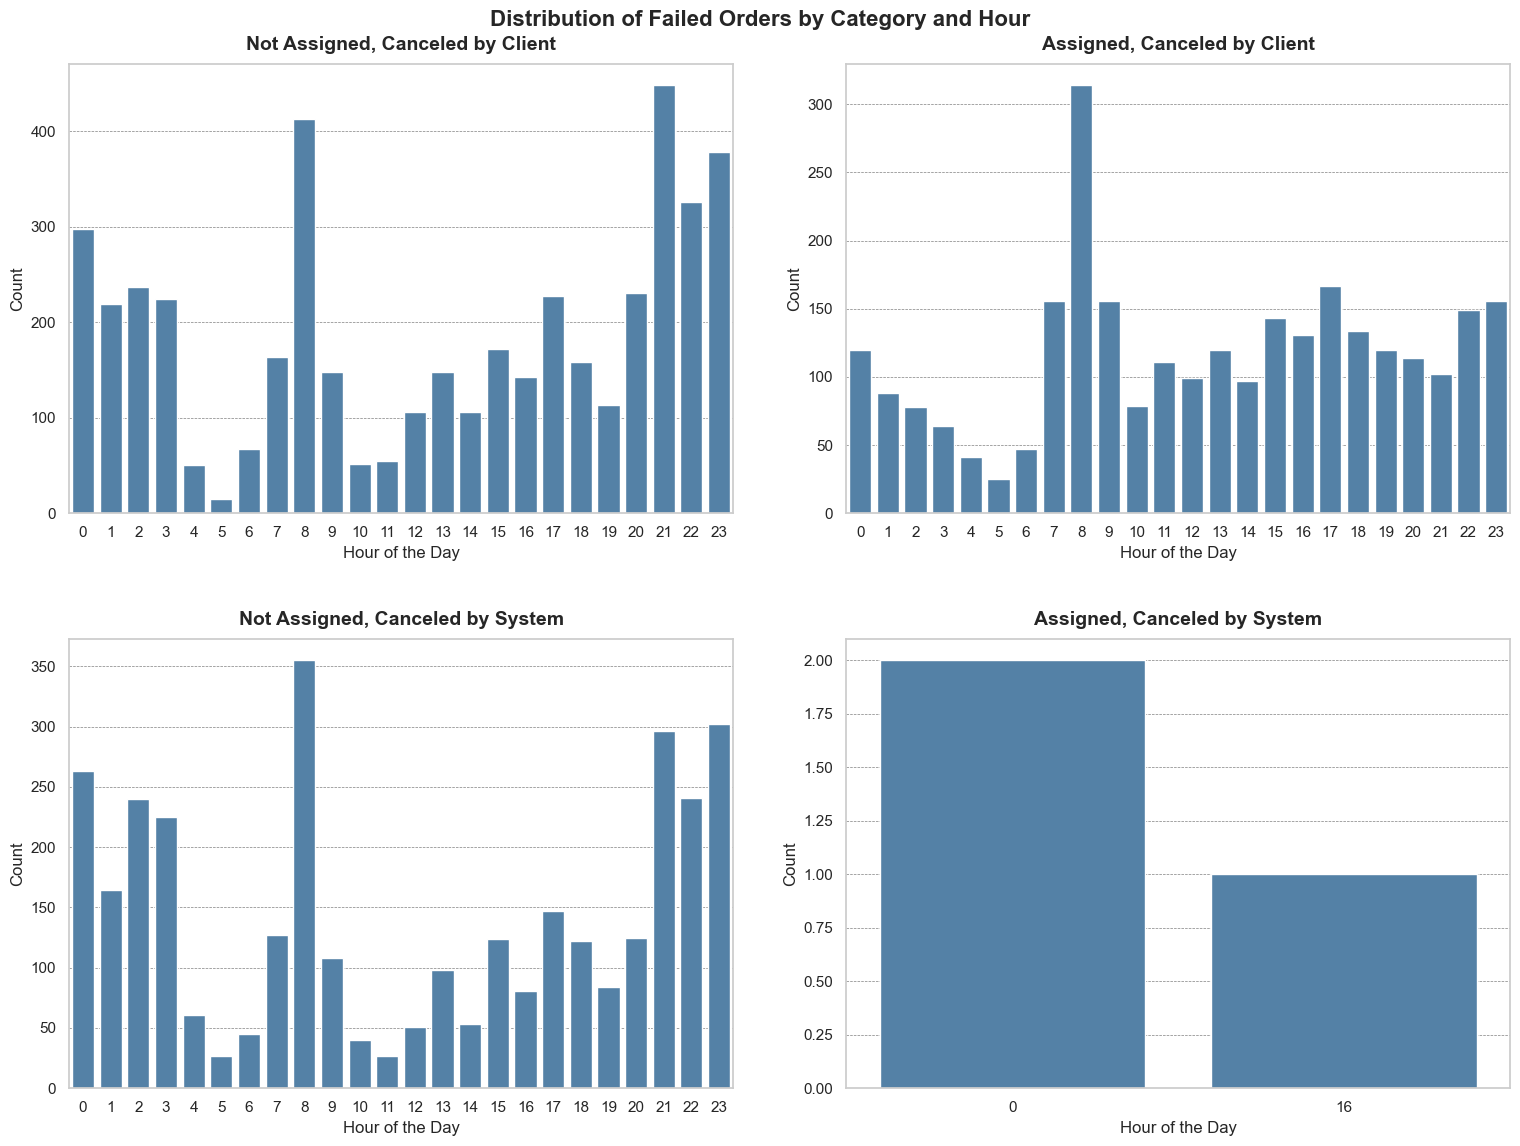

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels and corresponding conditions
labels = ['Not Assigned, Canceled by Client', 'Assigned, Canceled by Client', 'Not Assigned, Canceled by System', 'Assigned, Canceled by System']
conditions = [
    ((df['is_driver_assigned_key'] == 0) & (df['order_status_key'] == 4)),
    ((df['is_driver_assigned_key'] == 1) & (df['order_status_key'] == 4)),
    ((df['is_driver_assigned_key'] == 0) & (df['order_status_key'] == 9)),
    ((df['is_driver_assigned_key'] == 1) & (df['order_status_key'] == 9))
]

# Create 4 subplots for each category
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, (label, condition) in enumerate(zip(labels, conditions)):
    # Filter data based on the condition
    filtered_data = df[condition].groupby('hour').size().reset_index(name='count')
    
    # Plot the data for the current category
    sns.barplot(x='hour', y='count', data=filtered_data, color='steelblue', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(label, fontsize=14, fontweight='bold', pad=10)
    axs[i//2, i%2].set_xlabel('Hour of the Day', fontsize=12)
    axs[i//2, i%2].set_ylabel('Count', fontsize=12)
    axs[i//2, i%2].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire plot
plt.suptitle('Distribution of Failed Orders by Category and Hour', fontsize=16, fontweight='bold')

plt.show()


#### Analysis and Answers:

    There were no significant differences between Assignment or Cancellation types.
    The 'Not Assigned, Canceled by Client' category experiences a higher volume of cancellations at night, possibly due to the scarcity of taxis during nighttime hours.

---

### 'Morning Peak' Analyse

In [10]:
df_client = df[df['m_order_eta']>700]

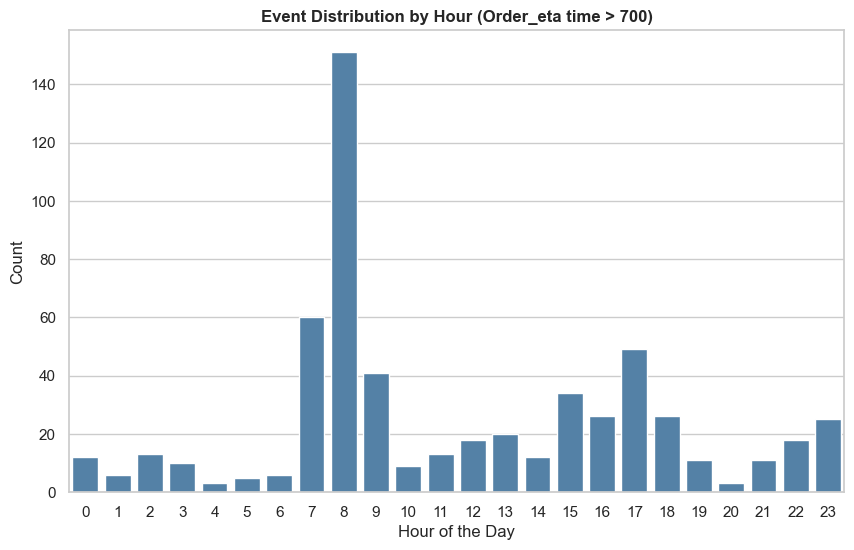

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by hour
grouped_data = df_client.groupby('hour').size().reset_index(name='count')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=grouped_data, color='steelblue')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Event Distribution by Hour (Order_eta time > 700)',fontweight='bold')

plt.show()


#### Analysis and Answers:

    After filtering out data points where the order ETA exceeds 700 seconds, the prominence of peaks around 8 o'clock becomes more pronounced. This reinforces the argument that heavy traffic congestion in the morning contributes significantly to this pattern.

---

<span style="color: green; font-size: 35px;">Q3</span>

Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

### Before dropping outliers

In [12]:
df3 = orders

/var/folders/g0/81mqbm3d64vg6jdjp2r87jph0000gn/T/ipykernel_4206/2349535425.py:36: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='hour', y='cancellations_time_in_seconds', hue='driver_status', data=grouped_data, palette=custom_palette, linewidth=2, alpha=0.8)


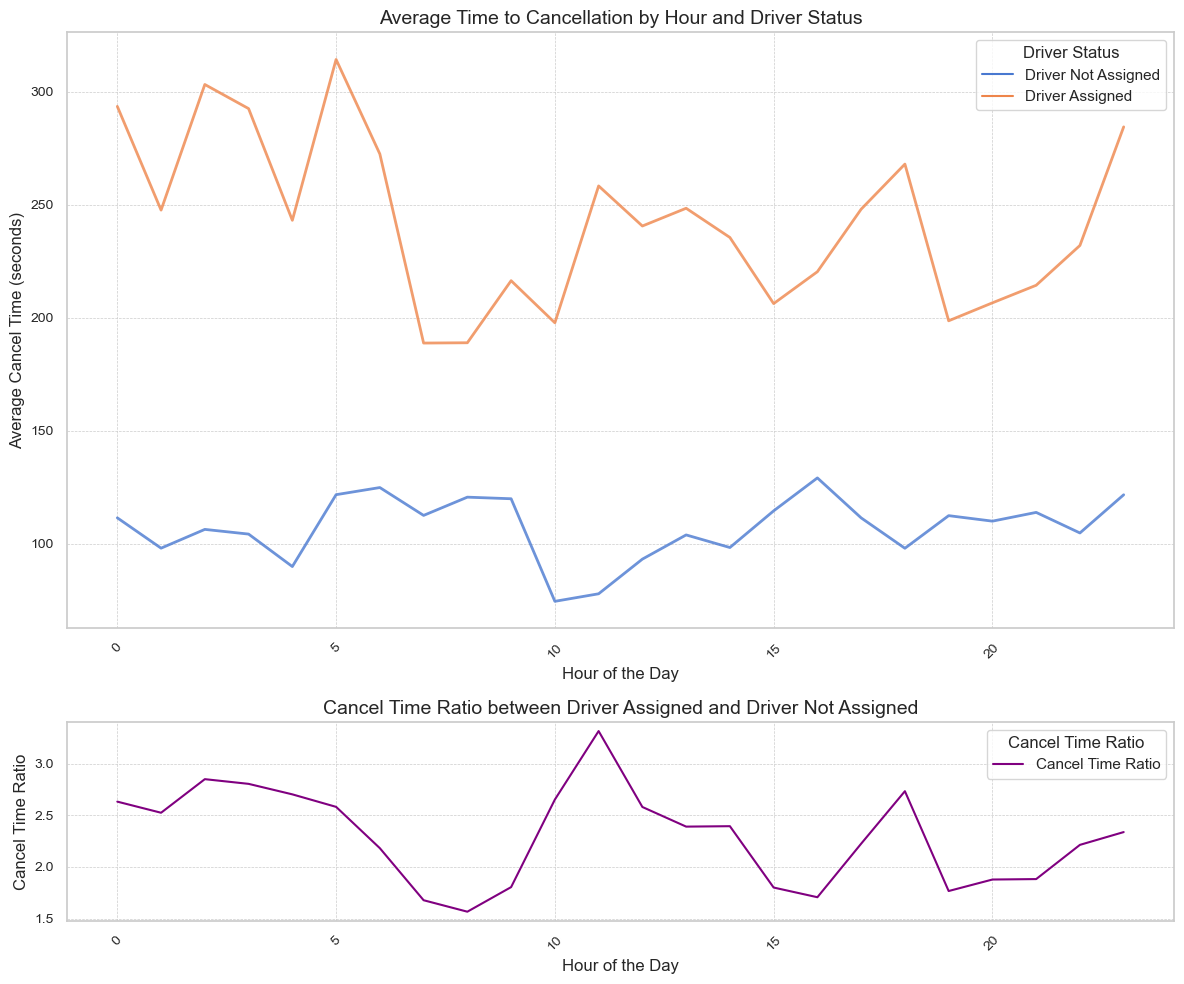

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Convert the order_datetime column to datetime format
df3['order_datetime'] = pd.to_datetime(df3['order_datetime'])

# Extract the hour component from order_datetime
df3['hour'] = df3['order_datetime'].dt.hour

# Group the data by hour and driver status, calculate the average cancel time in seconds
grouped_data = df3.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean()

# Reset the index to make the grouped data a DataFrame
grouped_data = grouped_data.reset_index()

# Map the is_driver_assigned_key values to clearer labels
grouped_data['driver_status'] = grouped_data['is_driver_assigned_key'].map({1: 'Driver Assigned', 0: 'Driver Not Assigned'})

# Calculate the ratio of cancel time between Driver Assigned and Driver Not Assigned
driver_assigned_data = grouped_data[grouped_data['driver_status'] == 'Driver Assigned']['cancellations_time_in_seconds'].values
driver_not_assigned_data = grouped_data[grouped_data['driver_status'] == 'Driver Not Assigned']['cancellations_time_in_seconds'].values
cancel_time_ratio = driver_assigned_data / driver_not_assigned_data

# Create a line plot to compare average cancel time by hour and driver status
plt.figure(figsize=(12, 10))  # Increase height to accommodate two plots

# Create a grid for the subplots with different heights
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# First subplot for the original line plot
plt.subplot(gs[0])
sns.set_style("whitegrid")  # Set the style
custom_palette = sns.color_palette("muted")  # Using the 'muted' color palette
sns.lineplot(x='hour', y='cancellations_time_in_seconds', hue='driver_status', data=grouped_data, palette=custom_palette, linewidth=2, alpha=0.8)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Cancel Time (seconds)', fontsize=12)
plt.title('Average Time to Cancellation by Hour and Driver Status', fontsize=14)
plt.legend(title='Driver Status', title_fontsize=12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot for the cancel time ratio plot with reduced height
plt.subplot(gs[1])
plt.plot(grouped_data[grouped_data['driver_status'] == 'Driver Assigned']['hour'], cancel_time_ratio, color='purple', label='Cancel Time Ratio')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Cancel Time Ratio', fontsize=12)
plt.title('Cancel Time Ratio between Driver Assigned and Driver Not Assigned', fontsize=14)
plt.legend(title='Cancel Time Ratio', title_fontsize=12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


---
### Finding ouliers
Using boxplot

Fill null value in cancellations_time_in_seconds with 0

In [14]:
# Fill null values in the cancel_time_seconds column with 0
df3['cancellations_time_in_seconds'].fillna(0, inplace=True)

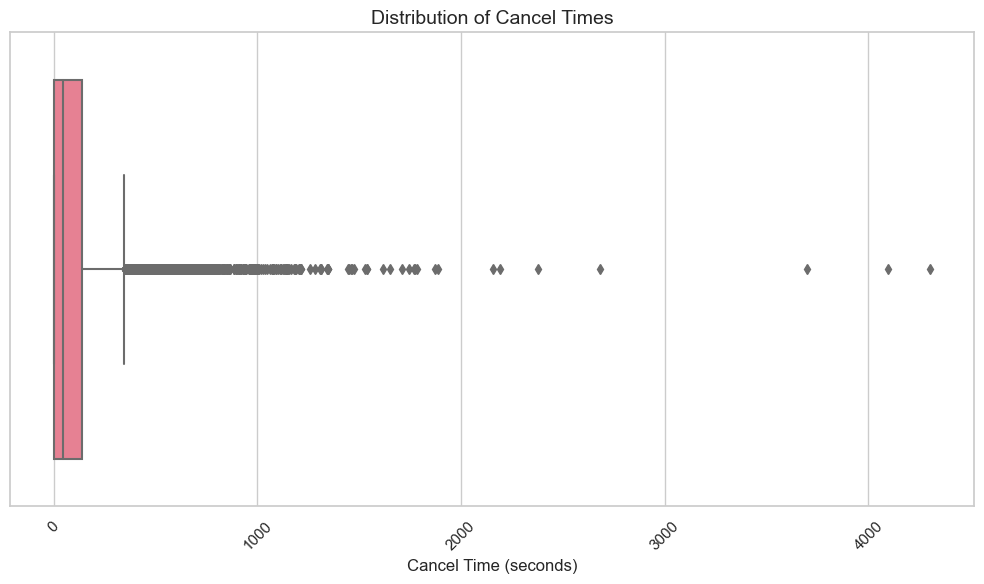

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the style

# Customize the color palette for the box plot
custom_palette = sns.color_palette("husl", 3)  # Using the 'husl' color palette with 3 colors

# Create the box plot with improved aesthetics
sns.boxplot(x=df3['cancellations_time_in_seconds'], orient='h', showfliers=True, palette=custom_palette)

# Add labels and title with improved font sizes
plt.xlabel('Cancel Time (seconds)', fontsize=12)
plt.title('Distribution of Cancel Times', fontsize=14)

# Adjust the x-axis label rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


#### Finding

    There were data points exceeding 2000 seconds, representing significant outliers that deviate from the main dataset.


---

### Dropping outliers
Dropping datas with cancel time larger than 2000

In [16]:
df4 = df3
df4 = df4[df4["cancellations_time_in_seconds"]<2000]
# df3[df3['is_driver_assigned_key'] ==1].count()
# df3[df3['is_driver_assigned_key'] ==0].count()

/var/folders/g0/81mqbm3d64vg6jdjp2r87jph0000gn/T/ipykernel_4206/3922512402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['order_datetime'] = pd.to_datetime(df3['order_datetime'])
/var/folders/g0/81mqbm3d64vg6jdjp2r87jph0000gn/T/ipykernel_4206/3922512402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['hour'] = df4['order_datetime'].dt.hour
/var/folders/g0/81mqbm3d64vg6jdjp2r87jph0000gn/T/ipykernel_4206/3922512402.py:36: UserWarning: The palette list has more values (10) than needed (2), w

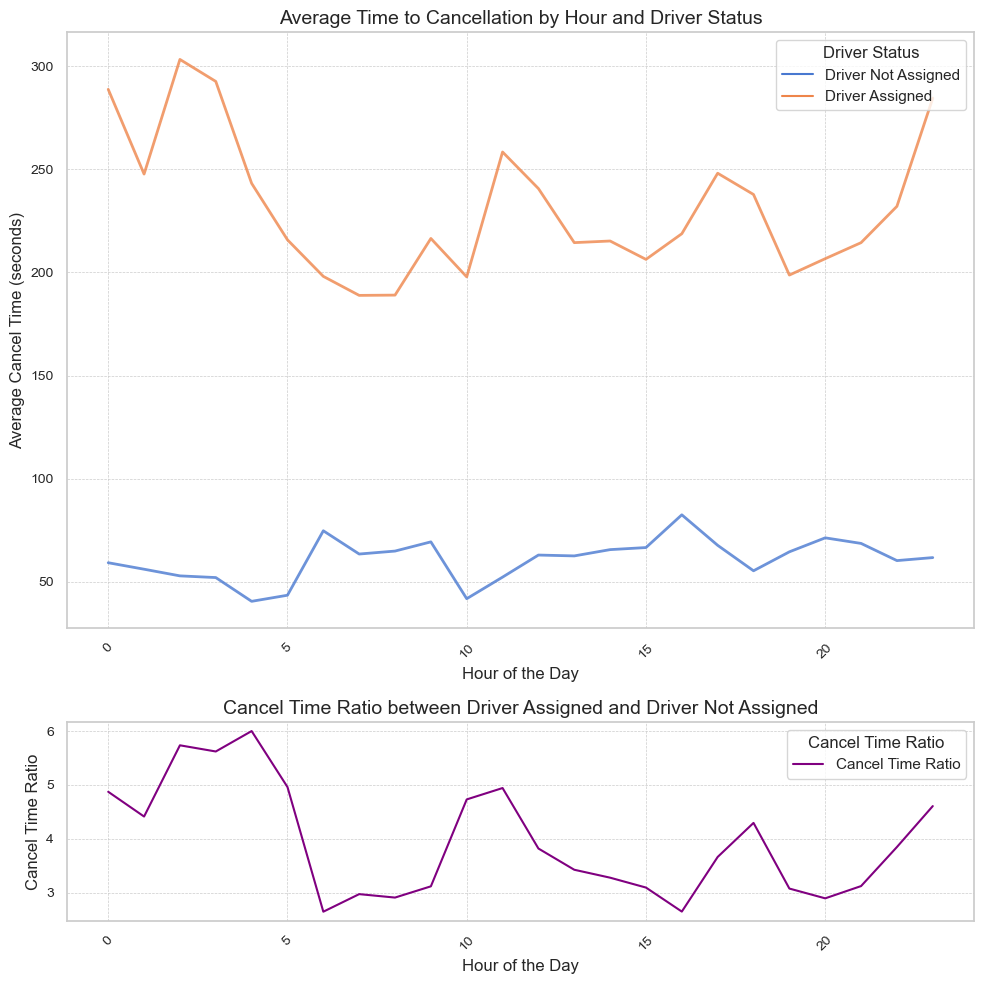

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Convert the order_datetime column to datetime format
df4['order_datetime'] = pd.to_datetime(df3['order_datetime'])

# Extract the hour component from order_datetime
df4['hour'] = df4['order_datetime'].dt.hour

# Group the data by hour and driver status, calculate the average cancel time in seconds
grouped_data = df4.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean()

# Reset the index to make the grouped data a DataFrame
grouped_data = grouped_data.reset_index()

# Map the is_driver_assigned_key values to clearer labels
grouped_data['driver_status'] = grouped_data['is_driver_assigned_key'].map({1: 'Driver Assigned', 0: 'Driver Not Assigned'})

# Calculate the ratio of cancel time between Driver Assigned and Driver Not Assigned
driver_assigned_data = grouped_data[grouped_data['driver_status'] == 'Driver Assigned']['cancellations_time_in_seconds'].values
driver_not_assigned_data = grouped_data[grouped_data['driver_status'] == 'Driver Not Assigned']['cancellations_time_in_seconds'].values
cancel_time_ratio = driver_assigned_data / driver_not_assigned_data

# Create a line plot to compare average cancel time by hour and driver status
plt.figure(figsize=(10, 10))  # Increase height to accommodate two plots

# Create a grid for the subplots with different heights
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# First subplot for the original line plot
plt.subplot(gs[0])
sns.set_style("whitegrid")  # Set the style
custom_palette = sns.color_palette("muted")  # Using the 'muted' color palette
sns.lineplot(x='hour', y='cancellations_time_in_seconds', hue='driver_status', data=grouped_data, palette=custom_palette, linewidth=2, alpha=0.8)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Cancel Time (seconds)', fontsize=12)
plt.title('Average Time to Cancellation by Hour and Driver Status', fontsize=14)
plt.legend(title='Driver Status', title_fontsize=12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Second subplot for the cancel time ratio plot with reduced height
plt.subplot(gs[1])
plt.plot(grouped_data[grouped_data['driver_status'] == 'Driver Assigned']['hour'], cancel_time_ratio, color='purple', label='Cancel Time Ratio')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Cancel Time Ratio', fontsize=12)
plt.title('Cancel Time Ratio between Driver Assigned and Driver Not Assigned', fontsize=14)
plt.legend(title='Cancel Time Ratio', title_fontsize=12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


#### Conclution and Possible Reasons:

    By analyzing the ratio between the two driver statuses, we can gain insights into the fluctuations of driver statuses throughout the day. Notably, cancellations between drivers and clients peak before dawn, possibly indicating a higher proportion of less desirable orders during these early hours. This could lead to some drivers being hesitant to accept such orders due to their perceived lower quality. Moreover, the search for a suitable driver tends to take longer during these hours.

    Additionally, cancellations that occur after assignment typically involve a longer duration compared to unassigned cancellations. The ratio between assigned and unassigned cancellations is distributed between 3 to 6. This delay is likely attributable to the extra time needed for the assignment process itself.
    
    Moreover, in the early hours before dawn, clients who are less rushed may be more tolerant of longer wait times for their orders. Conversely, around 8:00 AM, when they are heading to work, they tend to be in a hurry. This shift in urgency causes the ratio at 8:00 AM to decrease significantly.
    
---

<span style="color: green; font-size: 35px;">Q4</span>

Plot the distribution of average ETA by hours. How can this plot be explained?

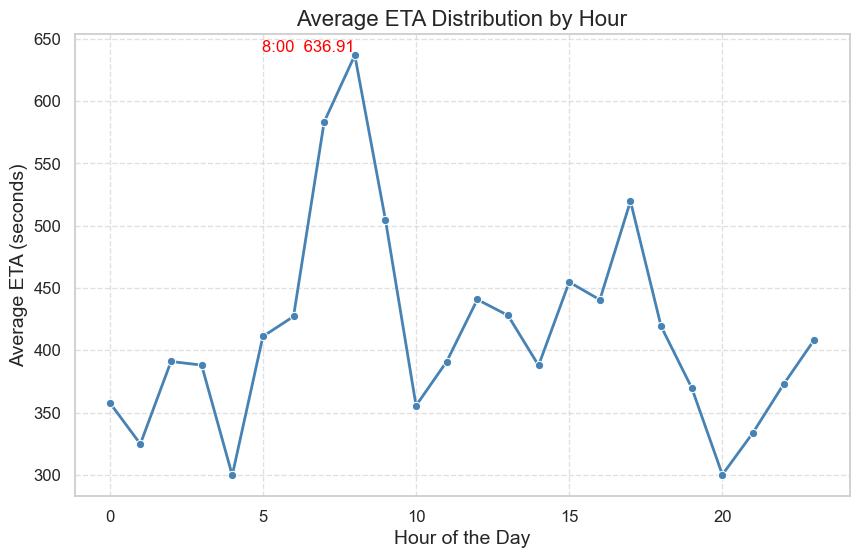

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average ETA by hour
average_eta_by_hour = orders.groupby('hour')['m_order_eta'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot using Seaborn with enhanced styling
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='m_order_eta', data=average_eta_by_hour, color='steelblue', marker='o', linewidth=2)

# Find the peak point and its value
peak_value = average_eta_by_hour['m_order_eta'].max()
peak_hour = average_eta_by_hour.loc[average_eta_by_hour['m_order_eta'].idxmax()]['hour']

# Annotate the peak point on the plot
plt.text(peak_hour, peak_value, f"8:00  {peak_value:.2f}", ha='right', va='bottom', fontsize=12, color='red')

# Add labels and title with increased font size
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average ETA (seconds)', fontsize=14)
plt.title('Average ETA Distribution by Hour', fontsize=16)

# Customize the tick labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for better visualization

plt.show()


#### Analysis and Answers:

    The first peak occurs at 8:00, as observed in Q1, coinciding with the morning rush hour when people are commuting to work. The surge in morning orders leads to a peak in demand, surpassing the available supply capacity. This imbalance results in higher ETA times due to the increased workload on the delivery system.

    The second peak emerges at 17:00, likely representing the evening rush hour as people are finishing work. The transition from work to home contributes to a spike in orders and delivery requests, impacting the ETA as demand peaks during this time.
    
---

<span style="color: green; font-size: 35px;">Q5</span>

BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualize the hexes, colouring them by the number of fails on the map.

In [19]:
import pandas as pd
import folium
import h3
from branca.colormap import linear

# Define the log base you want to use for scaling the point counts
log_base = 2  # You can change this value to adjust the log size

#Load your original dataset containing order information
#Assume the dataset is stored in a DataFrame called 'orders_df' with columns 'latitude', 'longitude'
points_df = df

#Calculate H3 hexagons at resolution 8 for each point
points_df['h3_hex'] = points_df.apply(lambda x: h3.geo_to_h3(x['origin_latitude'], x['origin_longitude'], 8), axis=1)

#Count the number of points within each hexagon
hex_counts = points_df['h3_hex'].value_counts().reset_index()
hex_counts.columns = ['h3_hex', 'point_count']

#Determine the H3 hexagons that contain 80% of all points
total_points = hex_counts['point_count'].sum()
threshold_point_count = total_points * 0.8
selected_hexes = hex_counts[hex_counts['point_count'].cumsum() <= threshold_point_count]['h3_hex']

hex_counts['log_point_count'] = np.log1p(hex_counts['point_count']) / np.log(log_base)

#Create a color gradient for the number of points
max_point_count = hex_counts['log_point_count'].max()
colormap = linear.YlOrRd_09.scale(0, max_point_count)  # Adjust the colormap as needed

#Create a folium map
m = folium.Map(location=[points_df['origin_latitude'].mean(), points_df['origin_longitude'].mean()], zoom_start=10)

#Visualize the hexagons on the map, coloring them based on the number of points
for index, row in hex_counts.iterrows():
    color = colormap(row['log_point_count'])  # Color based on the point count
    folium.Polygon(
    locations=h3.h3_to_geo_boundary(row['h3_hex']),
    color=color,
    fill_color=color,
    fill_opacity=0.6
    ).add_to(m)

#Add the colormap to the map
colormap.caption = 'Point Count'
m.add_child(colormap)

#Save the map to an HTML file
m.save('hex_map_points_colored.html')
# (hex_counts['point_count'].cumsum() <= threshold_point_count).sum()
m

### If the picture does not display. The html file is also being uploaded. 
    hex_map_points_colored.html

In [20]:
print(f"Number of size 8 hexagons needed to contain 80% of all orders: {(hex_counts['point_count'].cumsum() <= threshold_point_count).sum()}")

Number of size 8 hexagons needed to contain 80% of all orders: 23


#### Key Point

    I applied a logarithmic transformation to improve the visual clarity of the plot, particularly since the data points are predominantly clustered below 200. The dataset displays a distribution characterized by a long tail.
    
    Number of size 8 hexagons needed to contain 80% of all orders: 23
    
---